# Analysis of Quantitative Ratings

#### The RE-Pract Survey Research Questions

1. What is the relevance of RE research to practitioners in the industry?
2. What are the most highly rated research ideas?
3. What research problems do practitioners think are most important to be focused on by the RE research community?
4. Do papers with explicit ties to industry have higher practical relevance than other papers?
5. Do practitioners’ perceptions and views differ in dependence on their roles?

#### Our Data Sources

* 435 Paper Summaries with Metadata and Tags

* 154 Respondents with Metadata

* 2164 Paper Ratings

# Demographics

### Setup

In [1]:
%run setup.py
%matplotlib inline

### The Respondents

In [2]:
dfdict['truth_metadata'].head(3)


,lfdn,lfdn_original,v_5,v_6,v_11,v_118,v_119,v_120,v_121,v_12,v_14,v_15,v_16,v_19,v_124,v_5_6_integrated,v_15_16_integrated,v_11_coded,v_19_coded
0,0,106,Other (please specify),Researcher,4,not quoted,not quoted,quoted,not quoted,Yes,Small (1-4),Hybrid / mix of embedded systems and informati...,NotAnswered,Automotive,Italy,Researcher,Hybrid / mix of embedded systems and informati...,4.0,Automotive
1,1,131,Developer,NotAnswered,1,quoted,not quoted,not quoted,not quoted,Yes,Medium (5-10),(Business) information systems,NotAnswered,education,Belgium,Developer,(Business) information systems,1.0,Education
2,2,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,not quoted,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors


## Country

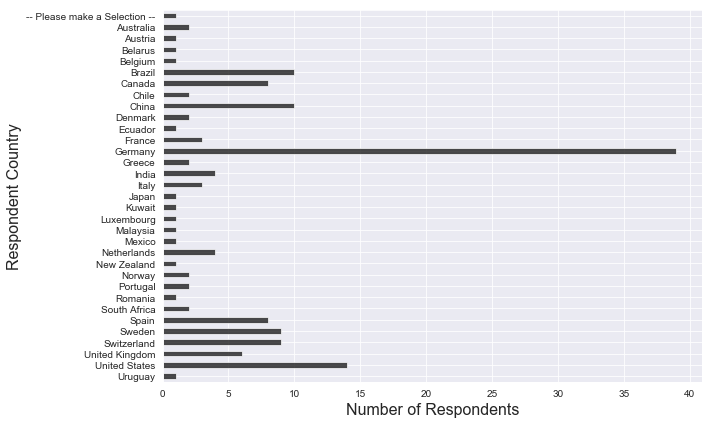

In [3]:
plot_sample(dfdict['truth_metadata'],'v_124', 'Respondent Country')

## Industry Sector

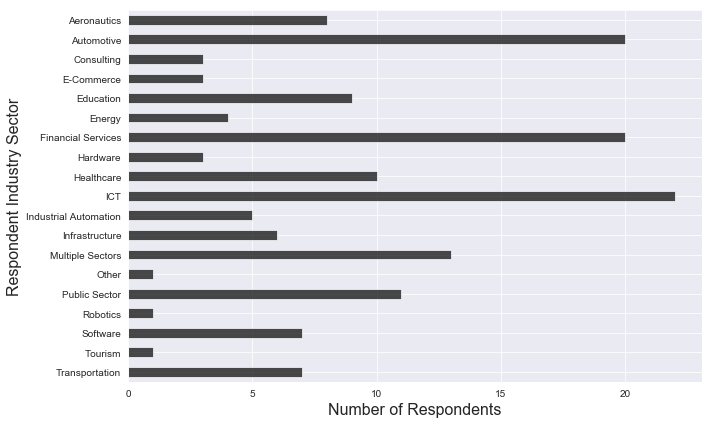

In [4]:
plot_sample(dfdict['truth_metadata'],'v_19_coded', 'Respondent Industry Sector')

## Role

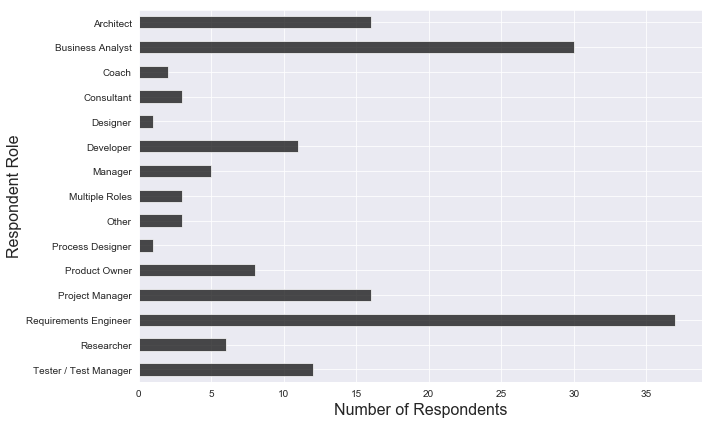

In [5]:
plot_sample(dfdict['truth_metadata'],'v_5_6_integrated', 'Respondent Role')

# Overall Ratings

In [6]:
ratings_with_respondent_meta.head(3)

,lfdn,PaperID,rating,lfdn_original,v_5,v_6,v_11,v_118,v_119,v_120,...,v_12,v_14,v_15,v_16,v_19,v_124,v_5_6_integrated,v_15_16_integrated,v_11_coded,v_19_coded
0,2,10,Worthwhile,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors
1,2,23,Unwise,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors
2,2,49,Essential,139,Other (please specify),Product Management Coach,10,quoted,quoted,quoted,...,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,Coach,Consumer Software,10.0,Multiple Sectors


rating
Unwise           92
Unimportant     548
Worthwhile     1003
Essential       521
Name: lfdn, dtype: int64

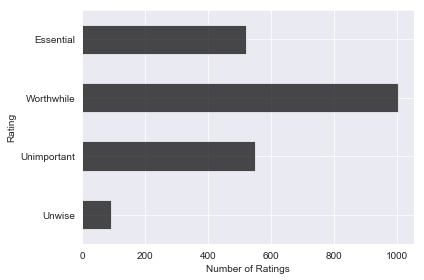

In [7]:
x = ratings_with_respondent_meta.groupby('rating').count(
                            )['lfdn'].sort_index(ascending=False)
x.plot.barh(stacked=False,color='k', alpha=0.7)
plt.ylabel('Rating')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = 9, 6
plt.savefig("../plots/overallPerception.pdf")
plt.savefig("../plots/overallPerception.png")
x

# Ratings Grouped by Respondent Metadata

## Respondent Role

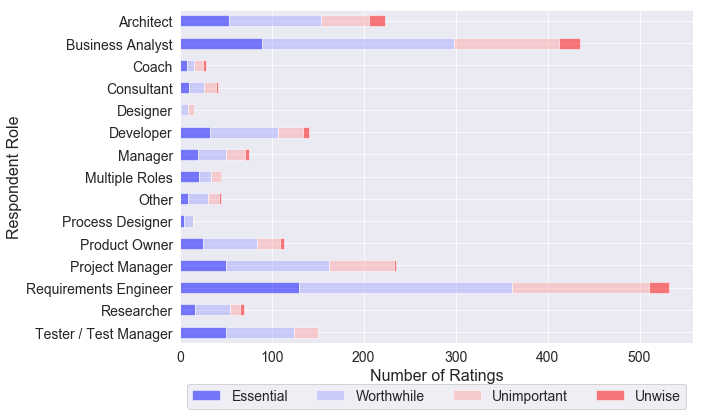

In [8]:
plot_df(ratings_with_respondent_meta, 'v_5_6_integrated', 'Respondent Role', absolute=True)

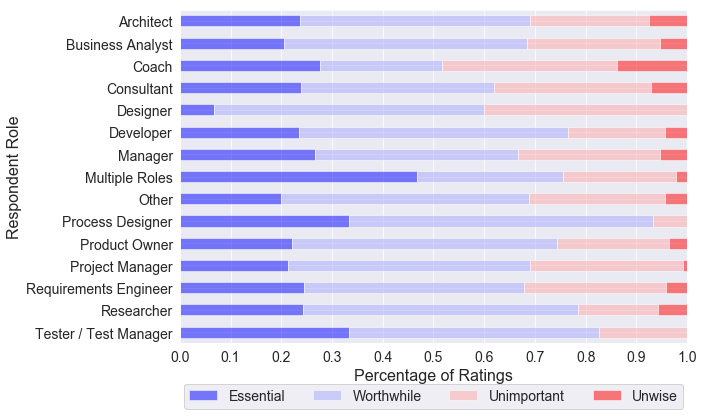

In [9]:
plot_df(ratings_with_respondent_meta, 'v_5_6_integrated', 'Respondent Role', absolute=False)

# Ratings Grouped by Paper Metadata

In [10]:
ratings_meta = dfdict['paper_metadata'].merge(dfdict['truth_ratings'], on='PaperID')
ratings_meta.head(3)

,PaperID,Title,Authors,Venue,Year,NumberOfPages,AcadVsInd,IndTrack,Summary,lfdn,rating
0,1,Software traceability with topic modeling,"Hazeline U. Asuncion, Arthur U. Asuncion, Rich...",ICSE,2010,10,Academic,No,A method for automatically recovering software...,16,Worthwhile
1,1,Software traceability with topic modeling,"Hazeline U. Asuncion, Arthur U. Asuncion, Rich...",ICSE,2010,10,Academic,No,A method for automatically recovering software...,52,Essential
2,1,Software traceability with topic modeling,"Hazeline U. Asuncion, Arthur U. Asuncion, Rich...",ICSE,2010,10,Academic,No,A method for automatically recovering software...,96,Worthwhile


## Author Affiliations and Conference Tracks

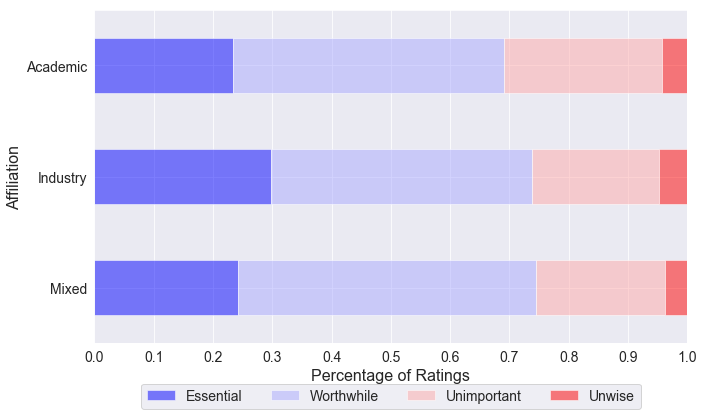

In [11]:
plot_df(ratings_meta, 'AcadVsInd', 'Affiliation', absolute=False)

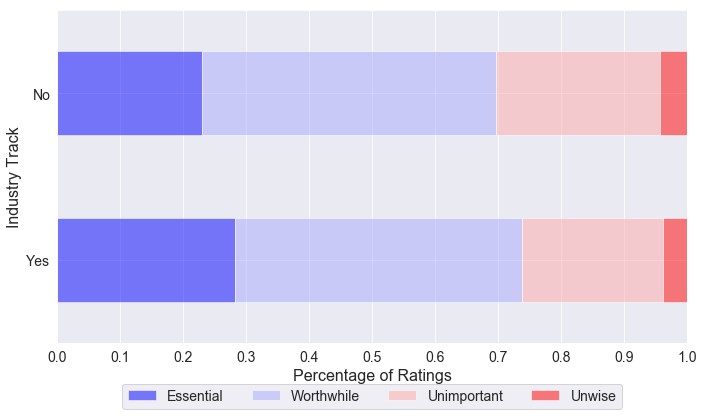

In [12]:
plot_df(ratings_meta, 'IndTrack', 'Industry Track', absolute=False)

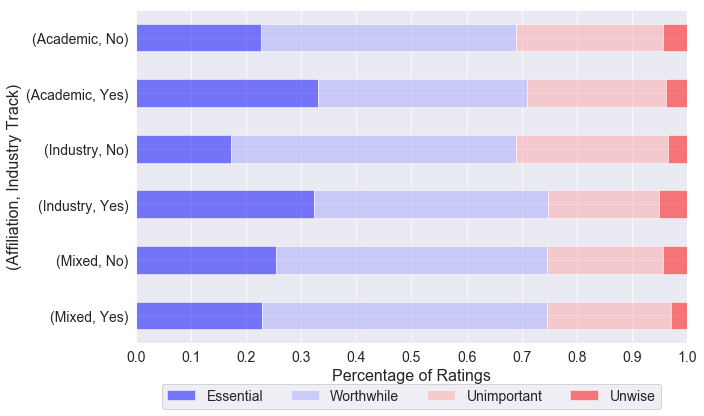

In [13]:
plot_df(ratings_meta, ['AcadVsInd','IndTrack'], '(Affiliation, Industry Track)', absolute=False)
plt.savefig("../plots/ind_vs_academic.pdf")

# Ratings Grouped by Paper Tags

In [14]:
ratings_methodtags = papertags_method.merge(dfdict['truth_ratings'], on='PaperID')
ratings_methodtags.head(1)

,PaperID,PaperSummary,Tag,level_1,level_2,level_3,lfdn,rating
0,1,A method for automatically recovering software...,how:engineering:methodology,how,engineering,methodology,16,Worthwhile


In [15]:
ratings_contenttags = papertags_content.merge(dfdict['truth_ratings'], on='PaperID')
ratings_contenttags.head(1)

,PaperID,PaperSummary,Tag,level_1,level_2,level_3,level_4,lfdn,rating
0,1,A method for automatically recovering software...,what:challenge:content_traceability,what,challenge,content,traceability,16,Worthwhile


## Ratings Grouped by Research Method

rating                     Essential  Worthwhile  Unimportant  Unwise
level_2     level_3                                                  
perspective philosophy             1           3            1       1
engineering reference             10          11            4       1
perspective opinion                8          22           14       1
            review                12          30           23       3
engineering technology            28          70           49       7
science     intervention          19          96           69      13
perspective experience            30          89           56       7
science     interrogation         70         103           53       7
            observation          102         185           90      14
engineering methodology          244         403          200      38


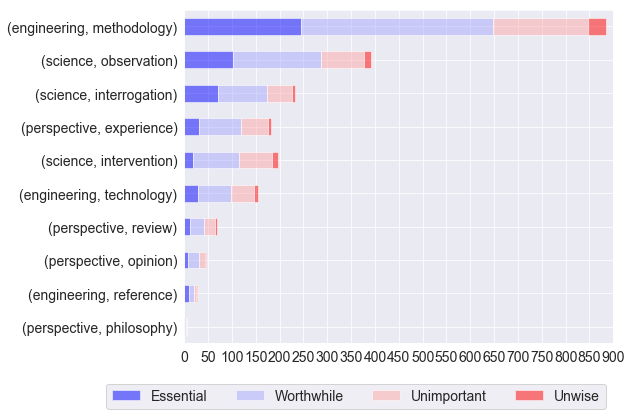

In [16]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=False).loc['how'], 
    sort_values=True, rel=False, step=50)

rating                     Essential  Worthwhile  Unimportant    Unwise
level_2     level_3                                                    
science     intervention    0.096447    0.487310     0.350254  0.065990
perspective review          0.176471    0.441176     0.338235  0.044118
engineering technology      0.181818    0.454545     0.318182  0.045455
perspective experience      0.164835    0.489011     0.307692  0.038462
            philosophy      0.166667    0.500000     0.166667  0.166667
            opinion         0.177778    0.488889     0.311111  0.022222
engineering methodology     0.275706    0.455367     0.225989  0.042938
science     observation     0.260870    0.473146     0.230179  0.035806
            interrogation   0.300429    0.442060     0.227468  0.030043
engineering reference       0.384615    0.423077     0.153846  0.038462


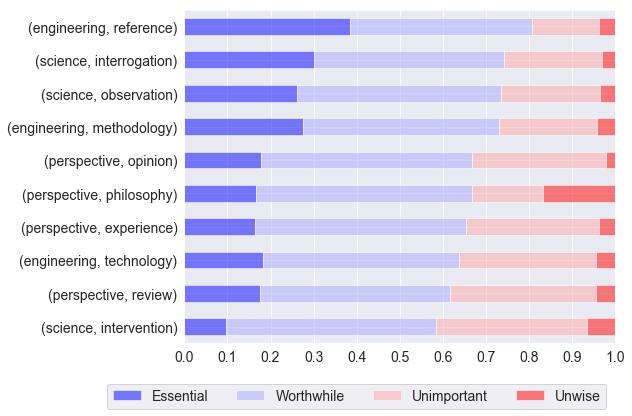

In [17]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=True).loc['how'], 
    sort_values=True, rel=True)

## Ratings Grouped by Evaluation Subjects

rating                       Essential  Worthwhile  Unimportant  Unwise
level_2       level_3                                                  
laypeople     others                 0           0            1       0
professionals academics              1           4            2       3
laypeople     students              13          75           57       9
professionals practitioners         53          76           32       2


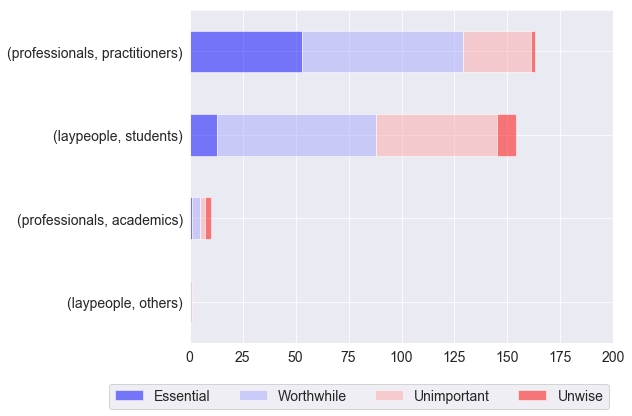

In [18]:
plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=False).loc['withwhom'], 
    sort_values=True, rel=False)

rating                       Essential  Worthwhile  Unimportant    Unwise
level_2       level_3                                                    
laypeople     others          0.000000    0.000000     1.000000  0.000000
professionals academics       0.100000    0.400000     0.200000  0.300000
laypeople     students        0.084416    0.487013     0.370130  0.058442
professionals practitioners   0.325153    0.466258     0.196319  0.012270


<Figure size 288x144 with 0 Axes>

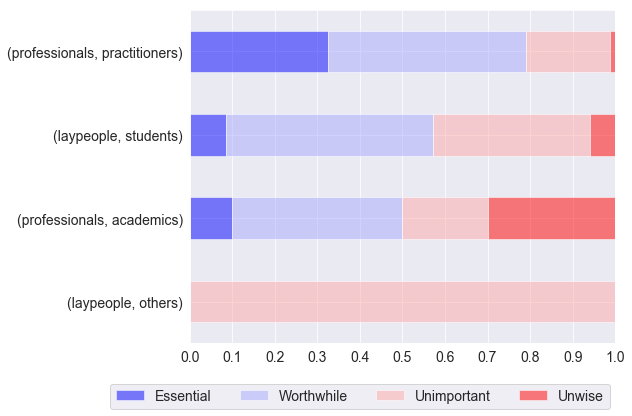

In [19]:
%run setup.py

plot_tag_ratings(
    tag_stats(ratings_methodtags, all_levels[:-1], totals=True, rel=True).loc['withwhom'], 
    sort_values=True, rel=True)
plt.savefig("../plots/students_vs_professionals.pdf")

## Ratings Grouped by Documentation Style

In [38]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)
data.head(3)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation


In [20]:
reshaped = \
(data.set_index(data.columns.drop('documentation',1).tolist())
   .documentation.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'documentation'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
2,5,A document-driven study on the relevancy of cl...,NaN,NaN,quality assurance,general,NaN,NaN,NaN,NaN
3,9,A tool for automating ambiguity detection and ...,unambiguousness,NaN,automation,natural language,NaN,NaN,NaN,NaN
4,11,A method for developing scenarios at multiple ...,consistency,NaN,NaN,scenarios,NaN,NaN,NaN,validation and verification


,lfdn,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
rating,,,,,,,,,,,
Essential,134,134,134,51,2,66,134,21,12,7,44
Worthwhile,261,261,261,81,13,150,261,48,23,8,67
Unimportant,152,152,152,51,8,85,152,22,7,4,32
Unwise,31,31,31,3,1,21,31,6,4,2,7


<Figure size 288x144 with 0 Axes>

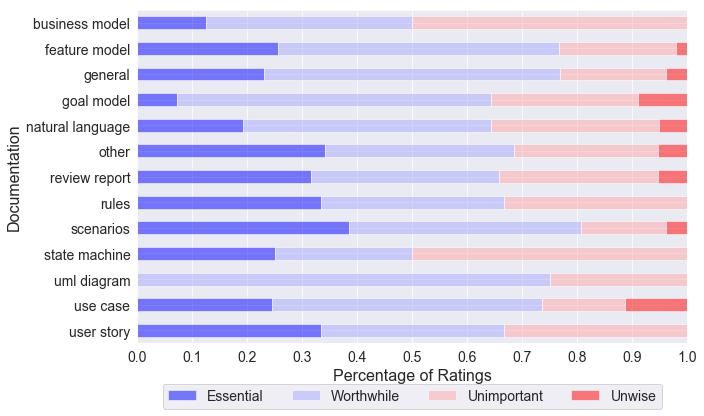

In [21]:
%run setup.py

ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'documentation', 'Documentation', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content.pdf")
ratings_with_tags.groupby('rating').count()


## Ratings based on People aspects

In [22]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('people',1).tolist())
   .people.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'people'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,16,An experiment with students on the effectivene...,NaN,creativity,NaN,NaN,NaN,NaN,NaN,elicitation
1,20,A method for building domain ontologies suitab...,understandability,subjectivity,NaN,NaN,NaN,NaN,NaN,elicitation
2,23,A method for systematically and repeatedly exc...,NaN,collaboration,NaN,NaN,NaN,NaN,NaN,NaN
3,27,A method for assessing the completeness of spe...,completeness,subjectivity,quality assurance,NaN,NaN,NaN,NaN,NaN
4,29,An experience report on the development of a s...,NaN,communication,modeling,NaN,NaN,NaN,NaN,NaN


,lfdn,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
rating,,,,,,,,,,,
Essential,76,76,76,9,76,13,2,10,7,4,20
Worthwhile,150,150,150,22,150,41,12,15,12,9,42
Unimportant,89,89,89,15,89,24,7,16,13,11,25
Unwise,19,19,19,1,19,1,1,4,3,2,6


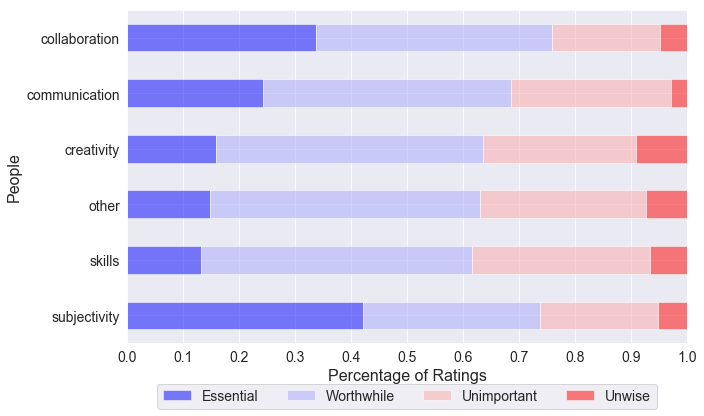

In [23]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'people', 'People', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_people.pdf")
ratings_with_tags.groupby('rating').count()

## Ratings based on Process

In [24]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('quality',1).tolist())
   .quality.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'quality'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,6,A case study on the effects of a highly ambigu...,unambiguousness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,A tool for automating ambiguity detection and ...,unambiguousness,NaN,automation,natural language,NaN,NaN,NaN,NaN
4,11,A method for developing scenarios at multiple ...,consistency,NaN,NaN,scenarios,NaN,NaN,NaN,validation and verification


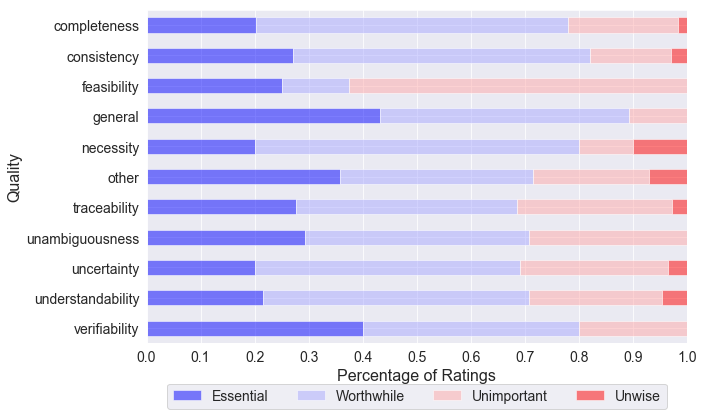

In [25]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'quality', 'Quality', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_quality.pdf")

## Rating based on Phase

In [26]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('phase',1).tolist())
   .phase.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'phase'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation
1,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
2,8,An interview-based study with practitioners fo...,NaN,NaN,quality assurance,NaN,process,NaN,NaN,validation and verification
3,11,A method for developing scenarios at multiple ...,consistency,NaN,NaN,scenarios,NaN,NaN,NaN,validation and verification
4,16,An experiment with students on the effectivene...,NaN,creativity,NaN,NaN,NaN,NaN,NaN,elicitation


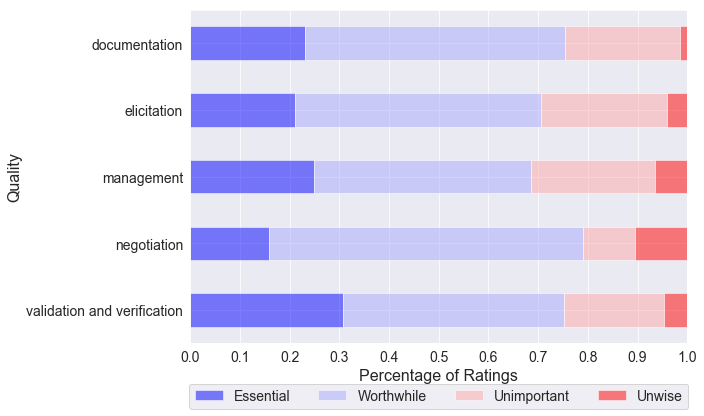

In [27]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'phase', 'Quality', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_phase.pdf")

## Ratings based on Process

In [28]:
data = dfdict['papertags_what-manual_final']
data.rename(columns={data.columns[0]:'PaperID'}, inplace=True)

reshaped = \
(data.set_index(data.columns.drop('process',1).tolist())
   .process.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'process'})
   .loc[:, data.columns]
)

reshaped.head(5)

,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation
3,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
4,5,A document-driven study on the relevancy of cl...,NaN,NaN,quality assurance,general,NaN,NaN,NaN,NaN


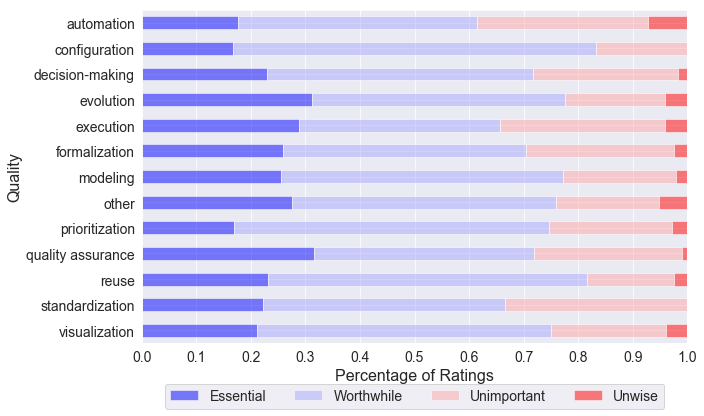

In [29]:
ratings_with_tags = dfdict['truth_ratings'].merge(reshaped, how='inner')
plot_df(ratings_with_tags, 'process', 'Quality', absolute=False)
plt.rcParams['figure.figsize'] = 9, 9
plt.savefig("../plots/content_process.pdf")

In [30]:
dfdict['truth_ratings']
dfdict['papertags_what-manual_final']


,PaperID,summary,quality,people,process,documentation,SM_first,SM_second,SM_third,phase
0,1,A method for automatically recovering software...,traceability,NaN,automation,general,NaN,NaN,NaN,NaN
1,2,A set of two techniques for improving the qual...,traceability,NaN,quality assurance,NaN,NaN,NaN,NaN,NaN
2,3,A case study on evaluating a given technique f...,NaN,NaN,prioritization,NaN,NaN,NaN,NaN,elicitation
3,4,An experience report on the development of a m...,NaN,NaN,formalization,general,NaN,NaN,NaN,validation and verification
4,5,A document-driven study on the relevancy of cl...,NaN,NaN,quality assurance,general,NaN,NaN,NaN,NaN
5,6,A case study on the effects of a highly ambigu...,unambiguousness,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,A data-driven study on the importance of quali...,NaN,NaN,NaN,NaN,quality ====>,generic,NaN,NaN
7,8,An interview-based study with practitioners fo...,NaN,NaN,quality assurance,NaN,process,NaN,NaN,validation and verification
8,9,A tool for automating ambiguity detection and ...,unambiguousness,NaN,automation,natural language,NaN,NaN,NaN,NaN
9,10,An experiment with practitioners for evaluatin...,NaN,NaN,evolution,NaN,NaN,NaN,NaN,NaN
